# Defining the Question

### a) Specifying the Question

Predict the chance of an email being spam or a not-spam using Naive Bayes theorem

### b) Defining the Metric for Success

Our analysis will be considered successful if we are able to create a Naive Bayes model that is able to effectively predict whether an email is spam or not.
our model should have an accuracy score of 80% or higher.

### c) Understanding the context 

The last column of the spam dataset denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.
Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail.


### d) Recording the Experimental Design

1. Defining the Question
2. Reading the Data.
3. Checking the Data.
4. Data Cleaning
5. Performing EDA
6. Building Naive Bayes Theorem
7. Evaluation of the solution
8. Challenging the solution 
9. Conclusion

### e) Data Relevance

This will be discussed after the analysis and prediction has been completed

# Data Preparation

### Importing our Libraries

In [ ]:
# installing the necessary libraries not in google colab
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [133]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import re
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
import math
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [118]:
# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore') 

# subsequently let us set the pandas warning for chained assignments off
pd.options.mode.chained_assignment = None  # default='warn'

### Loading and Previewing our Dataset

In [119]:
# Loading the Dataset from the source i.e. csv
# Define the column names
spam_columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
'word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses',
'word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your',
'word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george',
'word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data',
'word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm',
'word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(',
'char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average',
'capital_run_length_longest','capital_run_length_total','spam']

df= pd.read_csv('/content/spambase.data', names=spam_columns)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Checking the Data

In [120]:
# Determining the no. of records in our train dataset
#
print('This train dataset has ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')

This train dataset has 4601 rows, and 58 columns


In [121]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [122]:
# checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [123]:
# let us see the columns in our dataframe
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


# Data Cleaning

In [53]:
# let us make a copy of our dataset to clean and do modelling on
df_copy = df.copy(deep = True)

In [54]:
# From our profile report, we can see that we have no duplicated rows
# But let us check 
df_copy.duplicated().sum()

391

In [55]:
# let us see these duplicated rows
df_copy[df_copy.duplicated()]
# we will drop these duplicated rows
df_copy.drop_duplicates(inplace=True)
df_copy.duplicated().sum()  

0

In [56]:
# let us check for missing values in our dataframe
df_copy.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [135]:
# Checking the entire profile of the dataframe
# Checking the entire profile of the dataframe
# profile = ProfileReport(df, title="Spam Profile Report", html={'style':{'full_width':True}})
# profile.to_notebook_iframe()

In [ ]:
# let us save our profile report
# profile.to_file(output_file="Spam_Profile_Report.html")

# Exploratory Data Analysis

In [57]:
# let us see some summary statistics of the dataset
df_copy.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,0.056686,0.565204,0.097656,0.061211,0.044803,0.253829,0.149154,0.188755,1.718368,0.084962,0.810040,0.131587,0.100622,0.090969,0.573995,0.279330,0.369838,0.128575,0.098382,0.103779,0.063544,0.044917,0.102333,0.045777,0.107881,0.099368,0.143482,0.014190,0.084057,0.061278,0.041432,0.141542,0.048772,0.085266,0.320124,0.189375,0.005786,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,0.184167,0.882513,0.309309,0.346066,0.242186,0.797534,0.457669,0.541133,1.768760,0.505583,1.149352,1.071258,0.351336,0.431723,1.676539,0.905553,1.775330,0.535429,0.576796,0.439568,0.387267,0.300748,0.569146,0.301812,0.530263,0.386470,0.424508,0.230512,0.447991,0.319520,0.318177,0.793803,0.231871,0.646096,1.045914,0.928308,0.079170,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

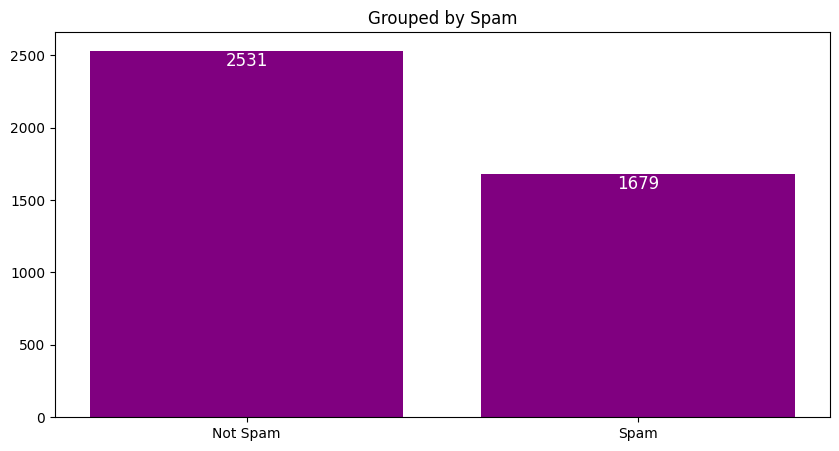

In [58]:
# let us see how many spam emails we have
spam_count = df_copy.groupby('spam')['spam'].count()

plt.figure(figsize=(10,5))
plt.bar(spam_count.index, spam_count.values, color='purple')
plt.title('Grouped by Spam')
plt.xticks([0,1],['Not Spam', 'Spam'])
for i, value in enumerate(spam_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

In [59]:
#Checking for correlation among variables
df_copy.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,0.063031,0.075911,0.061985,0.032263,0.022454,0.065443,0.081471,0.051571,0.120563,0.020924,0.121458,-0.025574,0.126478,0.205689,-0.075054,-0.063467,-0.048086,-0.050054,-0.041541,-0.054241,-0.038899,-0.031634,-0.042715,-0.026322,-0.046083,-0.057296,-0.058771,-0.008626,-0.011199,-0.035467,-0.005280,-0.026546,-0.025603,-0.022980,-0.037848,-0.034455,-0.000950,-0.018904,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,0.060724,0.026247,0.015538,0.012414,0.061826,0.046630,0.022018,0.178853,0.055876,-0.006735,0.117797,0.001214,0.007064,0.061282,-0.053573,-0.044627,-0.011228,-0.033000,-0.026048,-0.029419,-0.015937,0.028852,-0.032575,0.026039,-0.025524,-0.028262,0.003749,-0.012708,-0.016208,0.002326,-0.019350,-0.035908,0.037681,-0.029055,0.020029,-0.026004,-0.012337,-0.020947,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,0.055647,0.065733,0.036431,0.004900,0.104574,0.061937,0.029834,0.110794,0.126502,0.030874,0.147895,-0.039464,0.106694,0.031150,-0.092684,-0.066464,-0.081297,-0.051471,-0.057847,-0.030519,-0.036610,-0.063579,-0.058002,-0.063417,-0.048968,-0.047593,-0.074329,0.031756,-0.017418,-0.046013,-0.030822,-0.007620,-0.052736,-0.056883,-0.056600,-0.060558,0.027384,-0.029465,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,-0.013191,-0.018577,-0.013153,0.003379,0.005375,0.005798,-0.002827,0.016561,-0.009933,-0.005006,0.004577,0.030589,0.014715,0.025851,-0.015702,-0.014030,-0.009710,-0.010630,-0.007931,-0.010911,-0.007654,-0.006967,-0.008246,-0.006975,-0.005907,-0.006309,-0.007436,-0.002723,-0.004506,-0.007654,-0.006075,-0.008318,-0.009384,-0.006114,-0.013178,-0.009432,-0.003409,-0.001861,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,0.079164,0.055007,0.020657,0.001586,0.048309,0.079198,0.137868,0.050785,0.083092,0.027838,0.142992,-0.022715,0.062136,0.000321,-0.076783,-0.079807,-0.062482,-0.064151,0.039627,-0.053613,-0.042054,-0.024256,-0.034749,-0.024555,-0.051058,-0.052210,-0.077682,0.133057,-0.045512,-0.017580,-0.052325,0.107706,-0.054583,0.002771,-0.049497,-0.083315,-0.028146,-0.035040,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,0.056592,0.001582,0.067278,0.007932,0.140009,0.016681,0.057684,0.059196,0.083312,0.057502,0.105693,0.006869,0.181754,0.059429,-0.086682,-0.089520,-0.05

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a6c8865d0>,
      dtype=object)

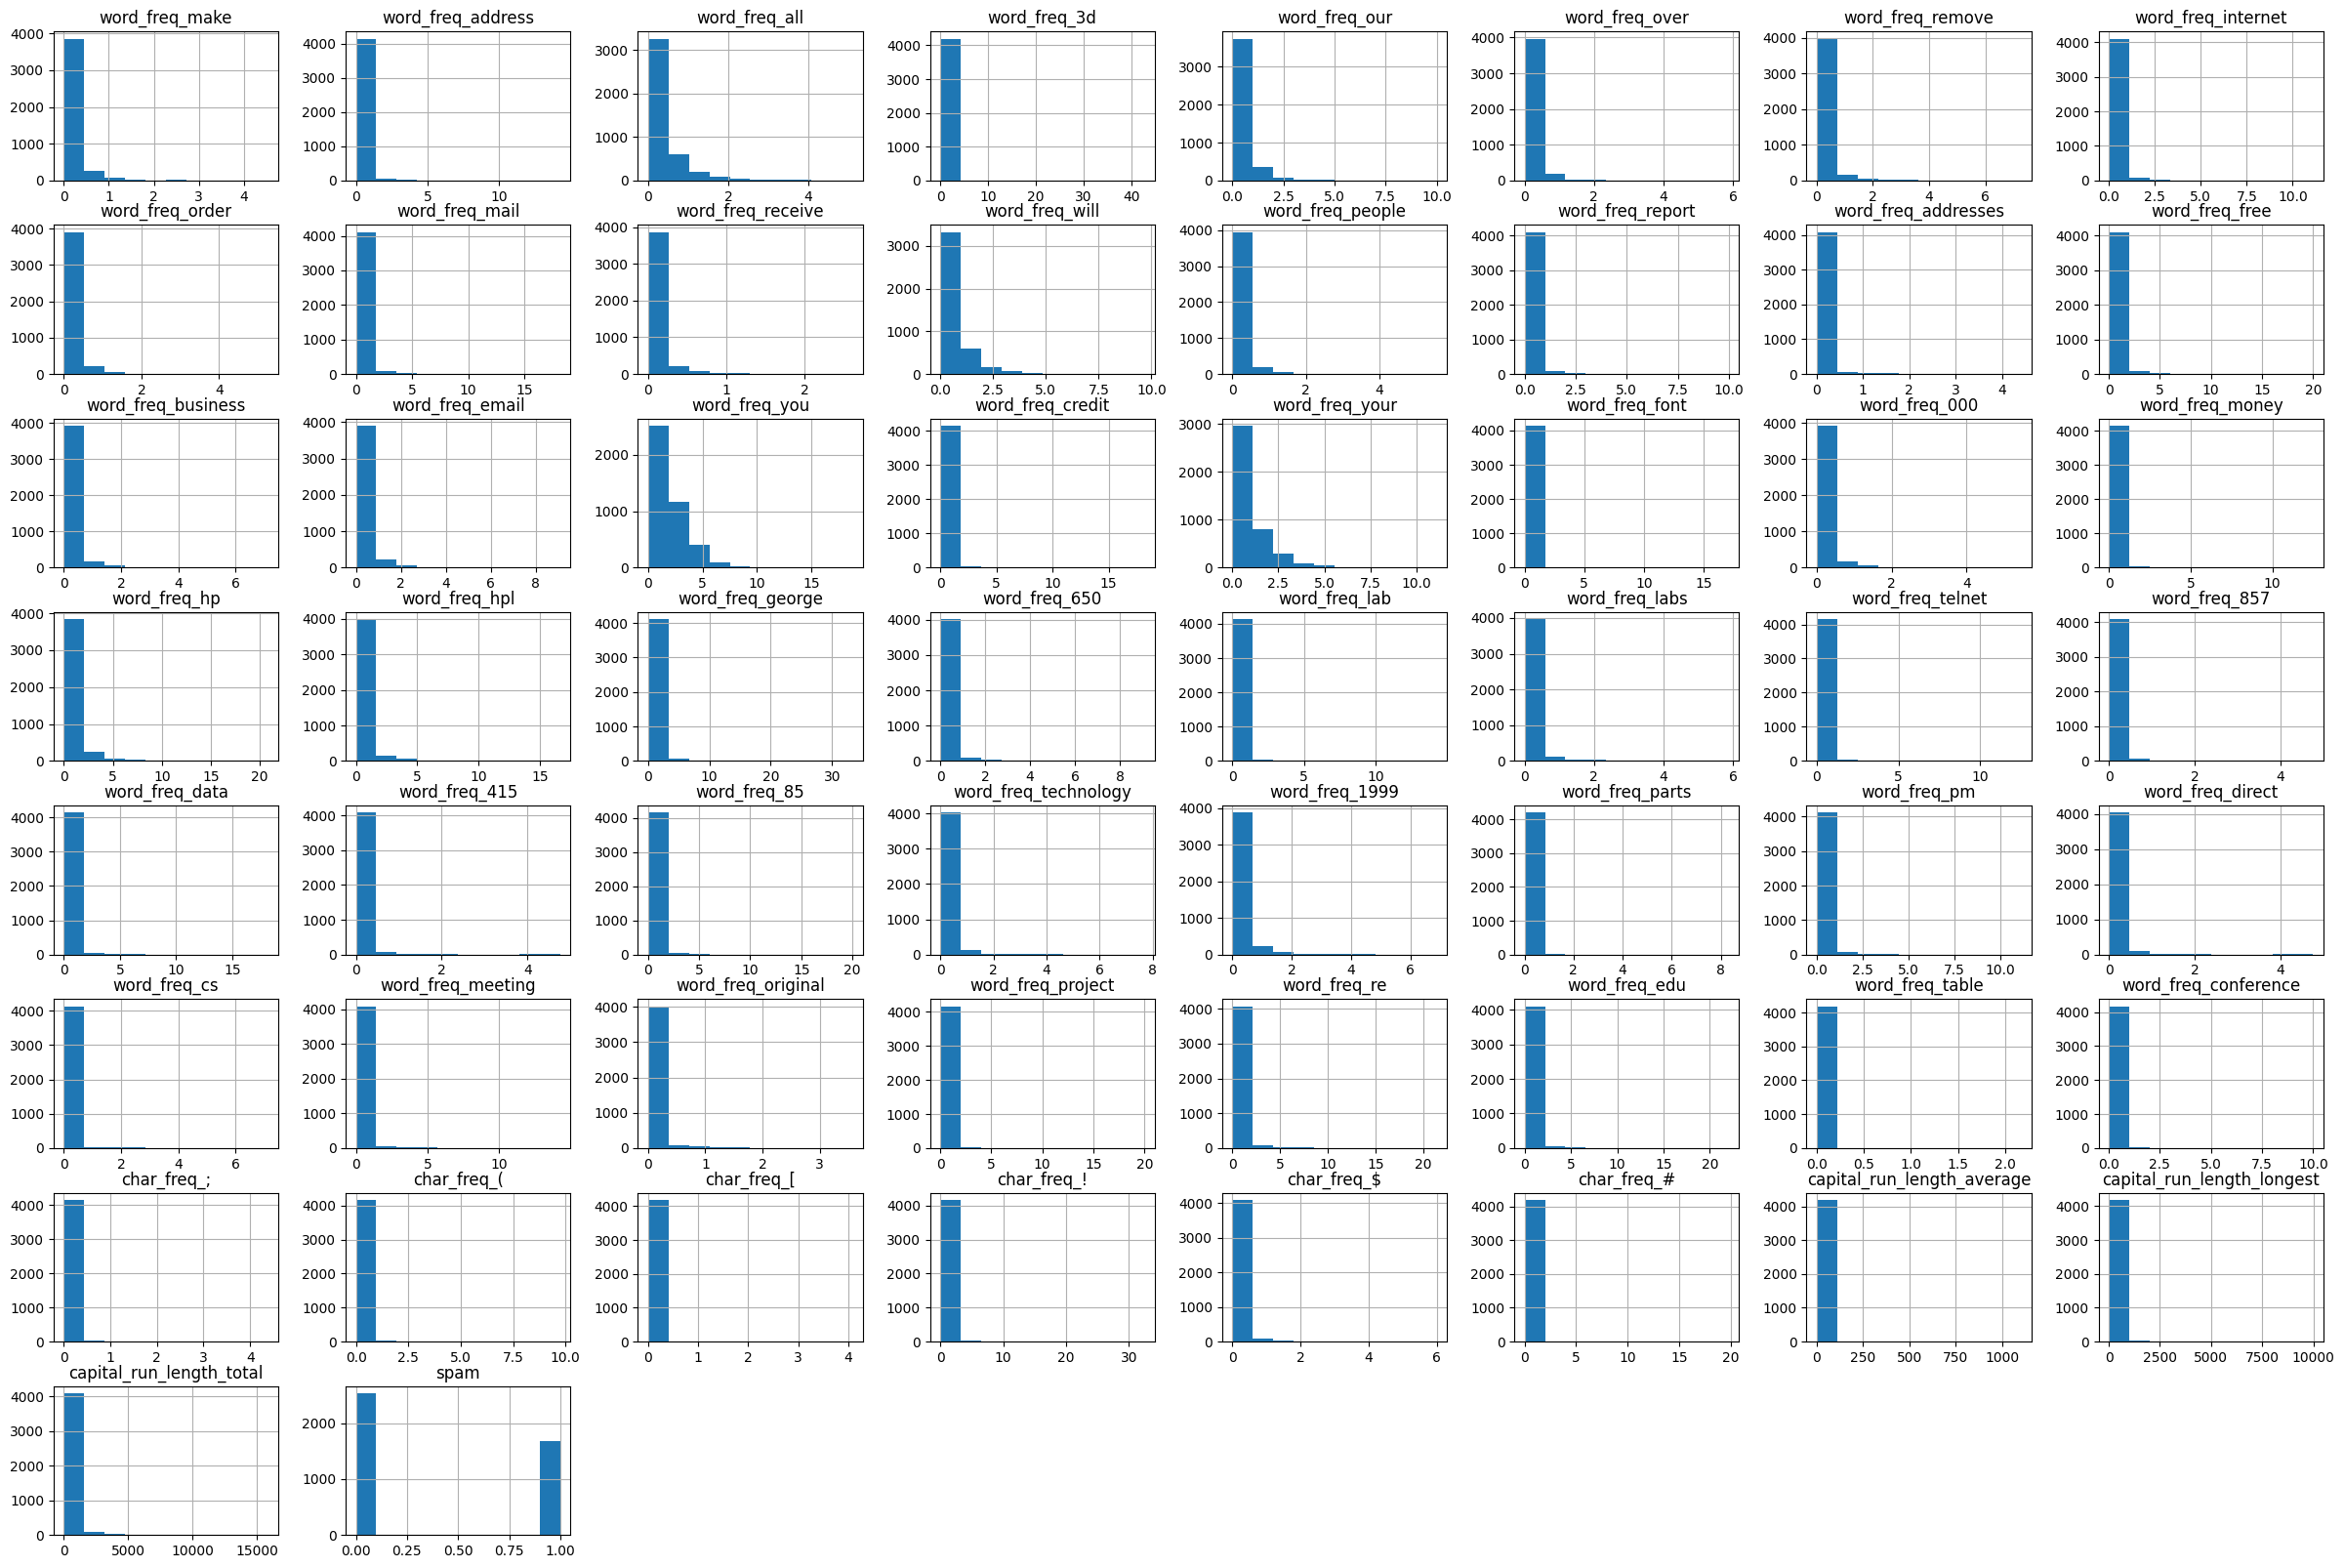

In [137]:
# let us plot histograms to visualize patterns in the data
df_copy.hist(figsize = (30,20))

# Implementing the Solution -(It's Modelling Time)

### Gaussian Naive Bayes Classifier

In [60]:
# Getting the independent and dependent variables
# 
X = df_copy.drop(columns = ['spam'], axis=1)
y = df_copy.spam

# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
# 
# Training our model
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("Naive bayes model accuracy(80-20 split) is", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Naive bayes model accuracy(80-20 split) is 0.8206650831353919
[[357 138]
 [ 13 334]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.83       495
           1       0.71      0.96      0.82       347

    accuracy                           0.82       842
   macro avg       0.84      0.84      0.82       842
weighted avg       0.86      0.82      0.82       842



In [61]:
# Getting the independent and dependent variables
# 
X = df_copy.drop(columns = ['spam'], axis=1)
y = df_copy.spam

# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)
# 
# Training our model
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("Naive bayes model accuracy(70-30 split) is", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Naive bayes model accuracy(70-30 split) is 0.833729216152019
[[541 196]
 [ 14 512]]
              precision    recall  f1-score   support

           0       0.97      0.73      0.84       737
           1       0.72      0.97      0.83       526

    accuracy                           0.83      1263
   macro avg       0.85      0.85      0.83      1263
weighted avg       0.87      0.83      0.83      1263



In [62]:
# Getting the independent and dependent variables
# 
X = df_copy.drop(columns = ['spam'], axis=1)
y = df_copy.spam

# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=0)
# 
# Training our model
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("Naive bayes model accuracy(60-40 split) is", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Naive bayes model accuracy(60-40 split) is 0.8319477434679335
[[735 259]
 [ 24 666]]
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       994
           1       0.72      0.97      0.82       690

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.87      0.83      0.83      1684



In [63]:
# for Gaussian NB our 70-30 split performs the best
# with an accuracy score 0.8337

### Multinomial Naive Bayes Classifier

In [64]:
# Getting the independent and dependent variables
# 
X = df_copy.drop(columns = ['spam'], axis=1)
y = df_copy.spam

# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
# 
# Training our model
from sklearn.naive_bayes import MultinomialNB  
model = MultinomialNB().fit(X_train, y_train)
# 
# Predicting our test predictors
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
# 
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("Naive bayes model accuracy(80-20 split) is", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Naive bayes model accuracy(80-20 split) is 0.7695961995249406
[[415  80]
 [114 233]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       495
           1       0.74      0.67      0.71       347

    accuracy                           0.77       842
   macro avg       0.76      0.75      0.76       842
weighted avg       0.77      0.77      0.77       842



In [65]:
# Getting the independent and dependent variables
# 
X = df_copy.drop(columns = ['spam'], axis=1)
y = df_copy.spam

# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)
# 
# Training our model
from sklearn.naive_bayes import MultinomialNB  
model = MultinomialNB().fit(X_train, y_train)
# 
# Predicting our test predictors

y_pred = model.predict(X_test)
# 
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("Naive bayes model accuracy(70-30 split) is", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Naive bayes model accuracy(70-30 split) is 0.782264449722882
[[624 113]
 [162 364]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       737
           1       0.76      0.69      0.73       526

    accuracy                           0.78      1263
   macro avg       0.78      0.77      0.77      1263
weighted avg       0.78      0.78      0.78      1263



In [66]:
# Getting the independent and dependent variables
# 
X = df_copy.drop(columns = ['spam'], axis=1)
y = df_copy.spam

# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=0)
# 
# Training our model
from sklearn.naive_bayes import MultinomialNB  
model = MultinomialNB().fit(X_train, y_train)
# 
# Predicting our test predictors

y_pred = model.predict(X_test)
# 
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("Naive bayes model accuracy(60-40 split) is", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Naive bayes model accuracy(60-40 split) is 0.7933491686460807
[[838 156]
 [192 498]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       994
           1       0.76      0.72      0.74       690

    accuracy                           0.79      1684
   macro avg       0.79      0.78      0.78      1684
weighted avg       0.79      0.79      0.79      1684



In [67]:
# for our multinomial Classifier, the 60-40 split performs best
# with and accuracy score of 0.7933

Comparing our Gaussian and Multinomial Naive Bayes Classifier, the Gaussian NB 70-30 split performs the bestwith an accuracy score 0.8337 as compared to Multinomial NB which did not give us an accuracy of 80 or higer.

In [114]:
# let us standardize our best model and see if performance will improve
# Getting the independent and dependent variables

X = df_copy.drop(columns = ['spam'], axis=1)
y = df_copy.spam

# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

# Feature Scaling
# it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training our model
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("Naive bayes model accuracy(70-30 split) is", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Naive bayes model accuracy(70-30 split) is 0.8297703879651623
[[537 200]
 [ 15 511]]
              precision    recall  f1-score   support

           0       0.97      0.73      0.83       737
           1       0.72      0.97      0.83       526

    accuracy                           0.83      1263
   macro avg       0.85      0.85      0.83      1263
weighted avg       0.87      0.83      0.83      1263



In [115]:
# standardization of the data does not improve the performance of our model 

# Improving Model Performance- Hyperparameter Tuning

In [141]:
# output the parameters to be hypertuned
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [165]:
#The var_smoothing parameter's default value is  10−9 . 
#We will conduct the grid search in the "logspace", that is, 
#we will search over the powers of 10. We will start with  100  and end with  10−9  
#and we will try 100 different values. For this search, we will use the logspace function in the numpy module.
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold

np.random.seed(999)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

cv_method = RepeatedStratifiedKFold(n_splits=15, 
                                    n_repeats=3, 
                                    random_state=0)

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_NB.fit(X_train, y_train)

gs_NB.best_params_
print(gs_NB.best_params_)
print(gs_NB.best_score_)
print(gs_NB.best_estimator_)

Fitting 45 folds for each of 100 candidates, totalling 4500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'var_smoothing': 5.336699231206313e-07}
0.8786266790980353
GaussianNB(priors=None, var_smoothing=5.336699231206313e-07)


[Parallel(n_jobs=1)]: Done 4500 out of 4500 | elapsed:   28.2s finished


In [161]:
# applying best params
# Getting the independent and dependent variables
# 
X = df_copy.drop(columns = ['spam'], axis=1)
y = df_copy.spam

# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)
# 
# Training our model
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB(priors=None, var_smoothing= 5.336699231206313e-07)
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("Naive bayes model accuracy(70-30 split) is", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Naive bayes model accuracy(70-30 split) is 0.8954869358669834
[[651  86]
 [ 46 480]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       737
           1       0.85      0.91      0.88       526

    accuracy                           0.90      1263
   macro avg       0.89      0.90      0.89      1263
weighted avg       0.90      0.90      0.90      1263



In [ ]:
# using best params has greatly increased our accuracy score
# from 0.8337 to 0.8954

# Improving Model Performance (Applying LDA)

In [140]:
# Getting the independent and dependent variables
# 
X = df_copy.drop(columns = ['spam'], axis=1)
y = df_copy.spam

#Train Test Split (70-30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Feature Scaling
# it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=40)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Training our model
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred_lda = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("Naive bayes model accuracy(70-30 split) is", accuracy_score(y_test,y_pred_lda))
print(confusion_matrix(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))

Naive bayes model accuracy(70-30 split) is 0.9073634204275535
[[693  44]
 [ 73 453]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       737
           1       0.91      0.86      0.89       526

    accuracy                           0.91      1263
   macro avg       0.91      0.90      0.90      1263
weighted avg       0.91      0.91      0.91      1263



In [ ]:
# using LDA with 40 features has increased  our accuracy score
# from 0.8337 to 0.9073 but greatly reduced the precision

# Improving Model Performance (Applying PCA)

In [107]:
# Getting the independent and dependent variables
# 
pca = PCA(n_components = 40)
pca.fit(X)
x_pca = pca.transform(X)

# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.30)

# sandardizing the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# applying PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


# Training our model
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()
model = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred_pca = model.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
import scipy.stats as stats
print("Naive bayes model accuracy(70-30 split) is", accuracy_score(y_test,y_pred_pca))
print(confusion_matrix(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

Naive bayes model accuracy(70-30 split) is 0.8479809976247031
[[674  74]
 [118 397]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       748
           1       0.84      0.77      0.81       515

    accuracy                           0.85      1263
   macro avg       0.85      0.84      0.84      1263
weighted avg       0.85      0.85      0.85      1263



In [87]:
#Finding the best principal Components
# 
from sklearn.decomposition import PCA
np.random.seed(0)
X = df_copy.drop(['spam'], axis=1)
train_features = X
model = PCA(n_components=40).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]
# 
# get the index of the most important feature on EACH component
most_import = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df_copy.columns
# get the names
most_import_names = [initial_feature_names[most_import[i]] for i in range(n_pcs)]
# 
dic = {'PC{}'.format(i): most_import_names[i] for i in range(n_pcs)}
# build the dataframe
df_pca = pd.DataFrame(dic.items())
df_pca

,0,1
0,PC0,capital_run_length_total
1,PC1,capital_run_length_longest
2,PC2,capital_run_length_average
3,PC3,word_freq_you
4,PC4,word_freq_george
5,PC5,word_freq_you
6,PC6,word_freq_3d
7,PC7,word_freq_your
8,PC8,word_freq_font
9,PC9,word_freq_re


In [ ]:
# using PCA with 40 features has increased  our accuracy score
# from 0.8337 to 0.8479 but also reduced our precision 

# Challenging the Solution

In [96]:
# compare algorithms
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Getting the independent and dependent variables
X = df_copy.drop(columns = ['spam'], axis=1)
y = df_copy.spam

# Splitting the data into training and test sets,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.924665 (0.011573)
LDA: 0.886322 (0.015150)
KNN: 0.788938 (0.022068)
CART: 0.904300 (0.017341)
RF: 0.944351 (0.009490)
GBC: 0.942312 (0.010410)
NB: 0.823879 (0.014550)
SVM: 0.806260 (0.019829)


In [ ]:
# from the above results, 
# we can see that the NB model perfoms well however, 
# there are other models that would better predict the data

# Conclusion

Using the Gaussian Naive bayes classifier with best paramaters from GridSearch yielded the best prediction model with an accuracy score of 0.8954. This is the model we will pick and use for future predictions. 

# Follow up questions

a). Did we have the right data? 

YES we had the right data to carry out our analysis and modelling. 

However, more column explanation should be done for better understanding


b). Do we need other data to answer our question? 

NO the data we had is sufficient


c). Did we have the right question? 

YES we had the right question